In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime

In [3]:
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [4]:
dataset = datasets.ImageFolder("/content/drive/MyDrive/MepcoTropicLeaf-V1/Database", transform=transform)

In [5]:
dataset

Dataset ImageFolder
    Number of datapoints: 3777
    Root location: /content/drive/MyDrive/MepcoTropicLeaf-V1/Database
    StandardTransform
Transform: Compose(
               Resize(size=(299, 299), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [6]:
from PIL import Image

In [7]:
transforms = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

(-0.5, 1023.5, 767.5, -0.5)

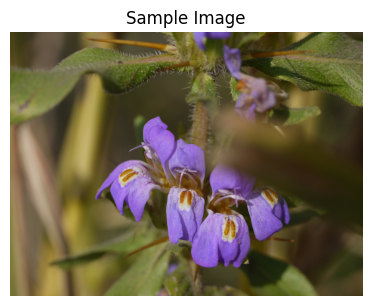

In [9]:
image_path = "/content/drive/MyDrive/kokilashaimg.jpg"
image = Image.open(image_path)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Sample Image")
plt.imshow(image)
plt.axis('off')

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model = torch.load("/content/drive/MyDrive/PlantMed.pt", map_location=device)
loaded_model.eval()

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [13]:
input_data = transforms(image).unsqueeze(0).to(device)
with torch.no_grad():
    output = loaded_model(input_data)
_, predicted_class = output.max(1)

class_to_idx = dataset.class_to_idx
idx_to_class = {idx: class_name for class_name, idx in class_to_idx.items()}
index = predicted_class.item()
class_name = idx_to_class.get(index, "Unknown")

print(f"The model has predicted:: {class_name}".replace('.zip',''))

The model has predicted:: Kokilaksha
